![](https://raw.githubusercontent.com/Qinbf/tf-model-zoo/master/README_IMG/01.jpg)
AI MOOC： **www.ai-xlab.com**  
如果你也是AI爱好者，可以添加我的微信一起交流：**sdxxqbf**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree

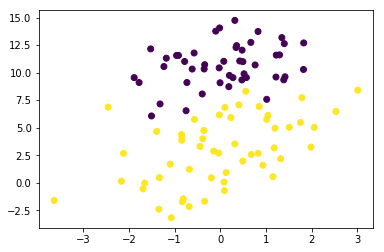

In [5]:
# 载入数据
data = np.genfromtxt("LR-testSet.csv", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]

plt.scatter(x_data[:,0],x_data[:,1],c=y_data) 
plt.show()

In [6]:
# 创建决策树模型
model = tree.DecisionTreeClassifier()
# 输入数据建立模型
model.fit(x_data, y_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [9]:
# 导出决策树
import graphviz # http://www.graphviz.org/

dot_data = tree.export_graphviz(model, 
                                out_file = None, 
                                feature_names = ['x','y'],
                                class_names = ['label0','label1'],
                                filled = True,
                                rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)

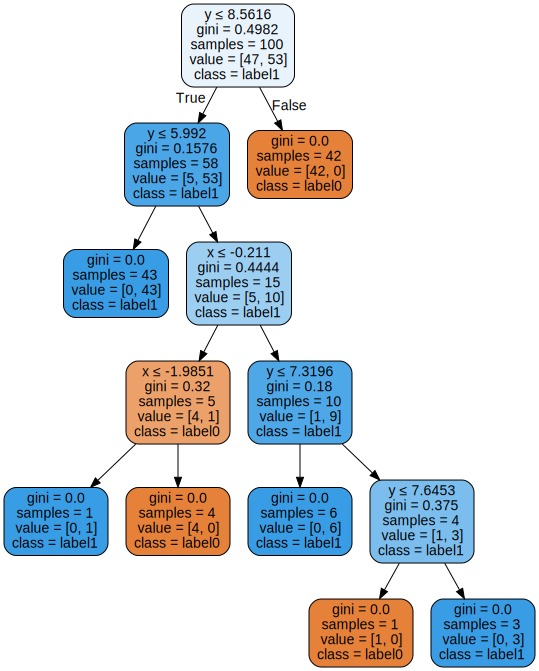

In [10]:
graph

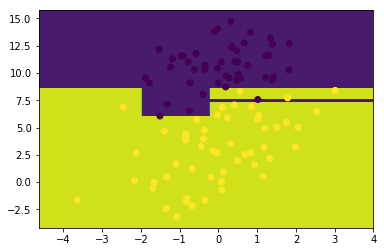

In [11]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [12]:
predictions = model.predict(x_data)
print(classification_report(predictions,y_data))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        47
        1.0       1.00      1.00      1.00        53

avg / total       1.00      1.00      1.00       100

